In [35]:
# import modulo os e installazione di rtree e altro per far funzionare l'sjoin
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0   860k      0 --:--:-- --:--:-- --:--:--  859k
checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for gcc... gcc
checking whether we are using the GNU C compil

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import pandas as pd #importazione pandas 
!pip install geopandas  # installazione geopandas
import geopandas
!pip install contextily
import contextily as ctx

In [38]:
area_sosta = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/eserciziGeoPandas/Geopandas - esercizio riepilogativo in preparazione alla verifica/bike_areesosta.zip')
milano = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/eserciziGeoPandas/Geopandas - esercizio riepilogativo in preparazione alla verifica/ds964_nil_wm (1).zip')
stradario = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/eserciziGeoPandas/Geopandas - esercizio riepilogativo in preparazione alla verifica/stradario.csv')
stradario  # creazione di piu geodataframe prendendo i dati da delle  cartelle zippate nel drive

CODICE_VIA AREA DESCRIZIONE_VIA  CIVICO BARRATO  CAP  SEZIONE  MUNICIPIO
0            4377  VIA  8 OTTOBRE 2001      12     NaN  138      916          4
1            3123  VIA     A.DEL SARTO       1     NaN  129      665          3
2            3123  VIA     A.DEL SARTO       3     NaN  129      665          3
3            3123  VIA     A.DEL SARTO       4     NaN  129      665          3
4            3123  VIA     A.DEL SARTO       5     NaN  129      665          3
...           ...  ...             ...     ...     ...  ...      ...        ...
51318        6318  VIA          ZURIGO      24     NaN  147      394          7
51319        6318  VIA          ZURIGO      24       4  147      394          7
51320        6318  VIA          ZURIGO      25     NaN  147     1412          6
51321        6318  VIA          ZURIGO      28     NaN  147      539          7
51322        6318  VIA          ZURIGO      65     NaN  147     1412          6

[51323 rows x 8 columns]

In [39]:
area_sosta #mostro il geodaframe

id_amat  ...                  geometry
0           2  ...  POINT (9.17821 45.42991)
1           4  ...  POINT (9.16829 45.51697)
2           8  ...  POINT (9.08480 45.47628)
3           9  ...  POINT (9.15673 45.48228)
4          10  ...  POINT (9.12054 45.45506)
...       ...  ...                       ...
1517     3232  ...  POINT (9.16586 45.50530)
1518     3233  ...  POINT (9.16628 45.50584)
1519     3234  ...  POINT (9.16634 45.50568)
1520     3235  ...  POINT (9.16633 45.50532)
1521     3243  ...  POINT (9.21895 45.43356)

[1522 rows x 12 columns]

In [40]:
milano #mostro il geodaframe

ID_NIL  ...                                           geometry
0       48  ...  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
2       67  ...  POLYGON ((9.15636 45.48785, 9.15724 45.48721, ...
3       81  ...  POLYGON ((9.16803 45.52234, 9.16687 45.52027, ...
4       84  ...  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...
..     ...  ...                                                ...
83      68  ...  POLYGON ((9.17174 45.47619, 9.17150 45.47595, ...
84       2  ...  POLYGON ((9.19165 45.46906, 9.19105 45.46843, ...
85      33  ...  POLYGON ((9.24044 45.44427, 9.24084 45.44424, ...
86      17  ...  POLYGON ((9.26729 45.51234, 9.26701 45.51241, ...
87      53  ...  POLYGON ((9.13575 45.44969, 9.13318 45.44886, ...

[88 rows x 9 columns]

# 1. una lista (elenco) delle aree di sosta, indicando il nome della via, il numero civico e il numero di posti totali per le **biciclette**

In [41]:
area_sosta.dtypes #controlla i tipi di tutte le colonne


id_amat          int64
id_via          object
num_civico      object
municipio       object
stato           object
categoriev      object
numero_man       int64
stalli_per       int64
stalli_tot       int64
tipomanufa      object
ubicazione      object
geometry      geometry
dtype: object

In [42]:
Stradario.dtypes #controlla i tipi di tutte le colonne 

CODICE_VIA          int64
AREA               object
DESCRIZIONE_VIA    object
CIVICO              int64
BARRATO            object
CAP                 int64
SEZIONE             int64
MUNICIPIO           int64
dtype: object

In [43]:
area_sosta[area_sosta['id_via'].isnull()]# cercare se ci sono campi vuoti in una colonna 

id_amat id_via  ...                     ubicazione                  geometry
50       65   None  ...  Area verde ? Giardino ? Parco  POINT (9.17257 45.42040)

[1 rows x 12 columns]

In [44]:
AreaSosta2 = area_sosta.drop(area_sosta[area_sosta["id_via"].isnull()].index) #dataframe senza il dato sopra tolto
AreaSosta2

id_amat  ...                  geometry
0           2  ...  POINT (9.17821 45.42991)
1           4  ...  POINT (9.16829 45.51697)
2           8  ...  POINT (9.08480 45.47628)
3           9  ...  POINT (9.15673 45.48228)
4          10  ...  POINT (9.12054 45.45506)
...       ...  ...                       ...
1517     3232  ...  POINT (9.16586 45.50530)
1518     3233  ...  POINT (9.16628 45.50584)
1519     3234  ...  POINT (9.16634 45.50568)
1520     3235  ...  POINT (9.16633 45.50532)
1521     3243  ...  POINT (9.21895 45.43356)

[1521 rows x 12 columns]

In [45]:
AreaSosta2['id_via']=AreaSosta2['id_via'].astype(int) #modifica as intero tutti i campi devono essere riempiti non possono esserci campi vuoti

In [48]:
elenco_aree_sosta2=pd.merge(AreaSosta2,stradario,how='inner',left_on=['id_via'],right_on=['CODICE_VIA']) 
elenco_aree_sosta2[['DESCRIZIONE_VIA','CIVICO','stalli_tot']]

DESCRIZIONE_VIA  CIVICO  stalli_tot
0       ABBIATEGRASSO       1          15
1       ABBIATEGRASSO       2          15
2       ABBIATEGRASSO       7          15
3       ABBIATEGRASSO       8          15
4       ABBIATEGRASSO      12          15
...               ...     ...         ...
39919     SAN DIONIGI     117          30
39920     SAN DIONIGI     119          30
39921     SAN DIONIGI     120          30
39922     SAN DIONIGI     121          30
39923     SAN DIONIGI     135          30

[39924 rows x 3 columns]

# **2. una lista (elenco) analogo al precedente ma con anche  l'indicazione del quartiere**

In [49]:
milano

ID_NIL  ...                                           geometry
0       48  ...  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
2       67  ...  POLYGON ((9.15636 45.48785, 9.15724 45.48721, ...
3       81  ...  POLYGON ((9.16803 45.52234, 9.16687 45.52027, ...
4       84  ...  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...
..     ...  ...                                                ...
83      68  ...  POLYGON ((9.17174 45.47619, 9.17150 45.47595, ...
84       2  ...  POLYGON ((9.19165 45.46906, 9.19105 45.46843, ...
85      33  ...  POLYGON ((9.24044 45.44427, 9.24084 45.44424, ...
86      17  ...  POLYGON ((9.26729 45.51234, 9.26701 45.51241, ...
87      53  ...  POLYGON ((9.13575 45.44969, 9.13318 45.44886, ...

[88 rows x 9 columns]

In [50]:
quartieri_sosta_tutto = geopandas.sjoin(elenco_aree_sosta, milano, op = "within", how = "left")
quartieri_sosta = quartieri_sosta_tutto[["AREA", "DESCRIZIONE_VIA", "CIVICO", "stalli_tot", "NIL"]]
quartieri_sosta

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


AREA  ...                                                NIL
0      PZA  ...  STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
1      PZA  ...  STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
2      PZA  ...  STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
3      PZA  ...  STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
4      PZA  ...  STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
...    ...  ...                                                ...
39919  VIA  ...                                       SCALO ROMANA
39920  VIA  ...                                       SCALO ROMANA
39921  VIA  ...                                       SCALO ROMANA
39922  VIA  ...                                       SCALO ROMANA
39923  VIA  ...                                       SCALO ROMANA

[39924 rows x 5 columns]

# **3. i nomi dei quartieri in cui non ci sono aree di sosta**

In [51]:
#  ~ il simbolo per la negazione della condizione, per esempio si usa per trovare quartieri fuori una regione invece di dentro

#   ~ milano["NIL"].isin(quartieri_sosta["NIL"])    ------>    serve per controllare i nomi dei quartieri d milano che non sono nella colonna dei quartieri nel df di quartieri_sosta
nomi_quartieri_no_aree = milano[~ milano["NIL"].isin(quartieri_sosta_tutto["NIL"])]
nomi_quartieri_no_aree[["NIL"]]

NIL
1                   TRENNO
5                   FIGINO
22              STEPHENSON
23               CANTALUPA
24              QUINTOSOLE
28   PARCO BOSCO IN CITTA'
36                 ASSIANO
46    RONCHETTO DELLE RANE
48  MONLUE' - PONTE LAMBRO
54             CHIARAVALLE
80         CASCINA MERLATA
82       PARCO DEI NAVIGLI

In [52]:
nomi_quartieri_no_aree

ID_NIL  ...                                           geometry
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
5       63  ...  POLYGON ((9.08375 45.48485, 9.08280 45.48521, ...
22      75  ...  POLYGON ((9.13009 45.50820, 9.13016 45.50784, ...
23      47  ...  POLYGON ((9.16112 45.42589, 9.16270 45.42544, ...
24      39  ...  POLYGON ((9.21047 45.39699, 9.21039 45.39698, ...
28      88  ...  POLYGON ((9.07309 45.50604, 9.07326 45.50589, ...
36      87  ...  POLYGON ((9.04687 45.46276, 9.04688 45.46276, ...
46      40  ...  POLYGON ((9.18364 45.40122, 9.18442 45.40004, ...
48      31  ...  POLYGON ((9.27271 45.46079, 9.27276 45.46072, ...
54      34  ...  POLYGON ((9.24507 45.41742, 9.24303 45.41508, ...
80      73  ...  POLYGON ((9.09928 45.53128, 9.09932 45.53118, ...
82      86  ...  POLYGON ((9.13886 45.42855, 9.13901 45.42836, ...

[12 rows x 9 columns]

# **4. una mappa di Milano con l'indicazione dei quartieri in cui non ci sono aree di sosta**

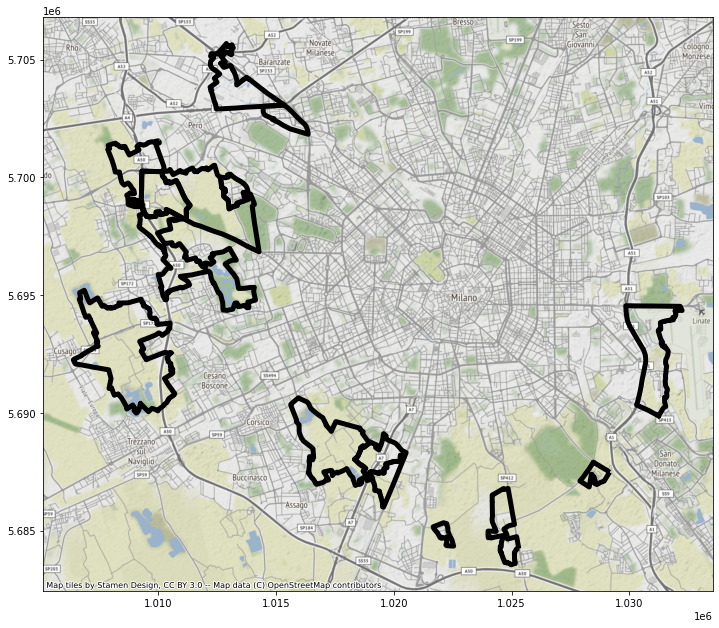

In [53]:
ax = nomi_quartieri_no_aree.to_crs(epsg=3857).plot(figsize = (12,12), facecolor = "none", linewidth = 5, edgecolor = "k")
ctx.add_basemap(ax)

# **5. il nome del quartiere con più aree di sosta**

In [54]:
quartieri_num_aree = quartieri_sosta_tutto.groupby("NIL", as_index = False)["stalli_tot"].count() 
quartiere_piu_aree = quartieri_num_aree[quartieri_num_aree.stalli_tot == quartieri_num_aree.stalli_tot.max()]
quartiere_piu_aree

NIL  stalli_tot
31  LORETO - CASORETTO - NOLO        4090

In [55]:
quartieri_num_aree

NIL  stalli_tot
0                                    ADRIANO          99
1                                     AFFORI         491
2   BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA         554
3                                 BANDE NERE         444
4                                     BARONA         236
..                                       ...         ...
71                         TRIULZO SUPERIORE          29
72              UMBRIA - MOLISE - CALVAIRATE         277
73                   VIGENTINO - Q.RE FATIMA         249
74       VILLAPIZZONE - CAGNOLA - BOLDINASCO         540
75                                XXII MARZO         409

[76 rows x 2 columns]

In [56]:
QmaxAree=quartieri_sosta_tutto.groupby('NIL').count().sort_values('DESCRIZIONE_VIA',ascending=False) #raggrupiamo tutti i quartieri, li contiamo, e li mettiamo in ordine decrescente 
QmaxAree.head(1).index #e prendiamo il primo 

Index(['LORETO - CASORETTO - NOLO'], dtype='object', name='NIL')

In [57]:
Qtpiuaree=milano[milano.NIL.isin(QmaxAree.head(1).index)] #cerchiamo i dati del quartiere trovato sopra e li diamo una variabile per salvarlo
Qtpiuaree

ID_NIL  ...                                           geometry
6      20  ...  POLYGON ((9.23044 45.49250, 9.23090 45.49197, ...

[1 rows x 9 columns]

# **6. una mappa di Milano con l'indicazione del quartiere con più aree di sosta**

In [58]:
quartieri_num_aree_con_geometria = milano[milano["NIL"].isin(quartieri_num_aree["NIL"])]
quartieri_num_aree_con_geometria

ID_NIL  ...                                           geometry
0       48  ...  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...
2       67  ...  POLYGON ((9.15636 45.48785, 9.15724 45.48721, ...
3       81  ...  POLYGON ((9.16803 45.52234, 9.16687 45.52027, ...
4       84  ...  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...
6       20  ...  POLYGON ((9.23044 45.49250, 9.23090 45.49197, ...
..     ...  ...                                                ...
83      68  ...  POLYGON ((9.17174 45.47619, 9.17150 45.47595, ...
84       2  ...  POLYGON ((9.19165 45.46906, 9.19105 45.46843, ...
85      33  ...  POLYGON ((9.24044 45.44427, 9.24084 45.44424, ...
86      17  ...  POLYGON ((9.26729 45.51234, 9.26701 45.51241, ...
87      53  ...  POLYGON ((9.13575 45.44969, 9.13318 45.44886, ...

[76 rows x 9 columns]

In [59]:
quartieri_num_aree_con_geometria_e_numStalli = pd.merge(quartieri_num_aree_con_geometria, quartieri_num_aree, how="outer", on="NIL").sort_values(by=['stalli_tot'], ascending= False).head(1)
quartieri_num_aree_con_geometria_e_numStalli

ID_NIL  ... stalli_tot
4      20  ...       4090

[1 rows x 10 columns]

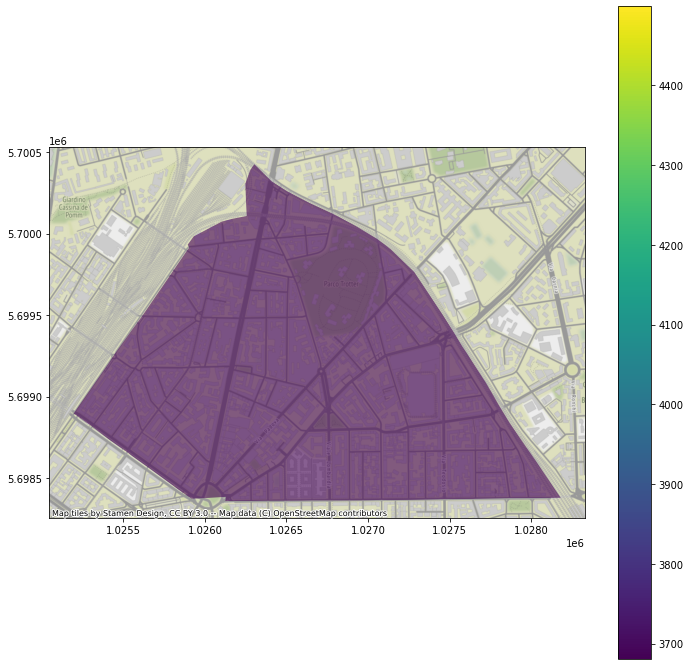

In [62]:

ax = quartieri_num_aree_con_geometria_e_numStalli.to_crs(epsg = 3857).plot(figsize = (12,12),column = "stalli_tot", legend = True, alpha = 0.6)
ctx.add_basemap(ax)


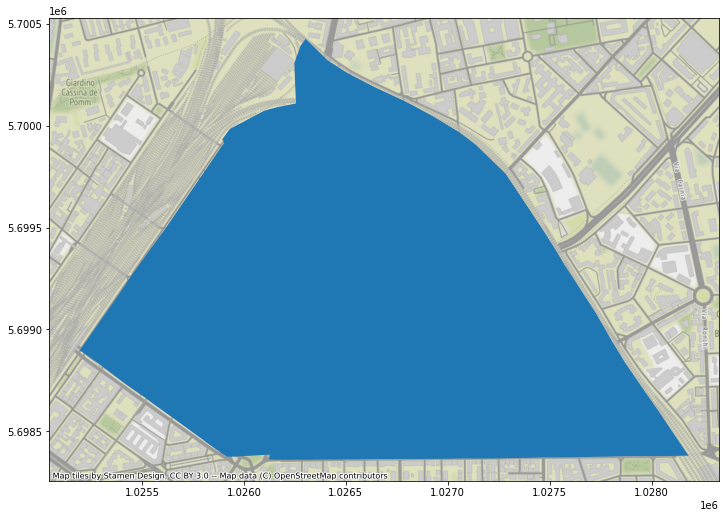

In [66]:
ax=Qtpiuaree.to_crs(epsg=3857).plot(figsize=(12,12))
ctx.add_basemap(ax)

# **7. i nomi dei quartieri con un numero di aree di sosta minori della media**

In [67]:
quartieri_num_aree.stalli_tot.mean() # fa la media dei stalli 

515.7894736842105

In [68]:
quartieri_minori_media =  quartieri_num_aree[quartieri_num_aree.stalli_tot < quartieri_num_aree.stalli_tot.mean()] #prende solo i valori minori della media 
quartieri_minori_media

NIL  stalli_tot
0                                             ADRIANO          99
1                                              AFFORI         491
3                                          BANDE NERE         444
4                                              BARONA         236
5                                             BICOCCA         401
6                                              BOVISA         395
7                                           BOVISASCA         146
9                                            BRUZZANO         130
13                                           COMASINA          20
15                             DE ANGELI - MONTE ROSA         454
16                                            DERGANO         354
18                                             FARINI          64
20                                           GHISOLFA         189
21                                        GIAMBELLINO         357
22                              GIARDINI P.TA VENEZIA         336
24       GRATOSOGLIO - Q.RE MISSAGLIA - Q.RE TERRAZZE         220
25                                    GRECO - SEGNANO         365
28                                  LAMBRATE - ORTICA         240
30                                        LORENTEGGIO         428
32                            MACIACHINI - MAGGIOLINA         445
33                               MAGENTA - S. VITTORE         474
34                       MAGGIORE - MUSOCCO - CERTOSA           8
35                          MONCUCCO - SAN CRISTOFORO         183
36                                          MORIVIONE         248
37                                           MUGGIANO          99
39                                        ORTOMERCATO          69
41                                             PAGANO         447
42                                PARCO DELLE ABBAZIE          12
43                         PARCO FORLANINI - CAVRIANO         150
44                                         PARCO NORD           6
45                                     PARCO SEMPIONE          18
48                                      PORTA MAGENTA         270
49                PORTA TICINESE - CONCA DEL NAVIGLIO         287
50                         PORTA TICINESE - CONCHETTA         387
51                   PORTA VIGENTINA - PORTA LODOVICA         284
52                                           PORTELLO         354
55                                               QT 8          73
56                                     QUARTO CAGNINO          71
57                  QUARTO OGGIARO - VIALBA - MUSOCCO         243
58                                      QUINTO ROMANO         100
59                            ROGOREDO - SANTA GIULIA          54
60     RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO          52
61                                            ROSERIO          23
62                                           SAN SIRO          81
64                                       SCALO ROMANA         244
65  STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...         469
66                                 STADIO - IPPODROMI         216
68              TALIEDO - MORSENCHIO - Q.RE FORLANINI          46
69                                            TIBALDI          16
70                                          TRE TORRI          28
71                                  TRIULZO SUPERIORE          29
72                       UMBRIA - MOLISE - CALVAIRATE         277
73                            VIGENTINO - Q.RE FATIMA         249
75                                         XXII MARZO         409

# **8. una mappa di Milano con l'indicazione  dei quartieri con un numero di aree di sosta minori della media**

In [ ]:
quartieri_minori_media_con_geometria = milano[milano["NIL"].isin(quartieri_minori_media["NIL"])] # elimina gli eventuali dati nulli 
quartieri_minori_media_con_geometria

In [72]:
quartieri_minori_media_con_geometria_e_numStalli = pd.merge(quartieri_minori_media_con_geometria, quartieri_minori_media, how="outer", on="NIL")
quartieri_minori_media_con_geometria_e_numStalli

ID_NIL  ... stalli_tot
0       48  ...         52
1       67  ...        354
2       81  ...        146
3       84  ...          6
4       76  ...        243
5       61  ...         71
6       60  ...        216
7       62  ...        100
8       57  ...         81
9       82  ...         20
10      43  ...         16
11      13  ...        365
12      58  ...        454
13      78  ...         64
14      83  ...        130
15      66  ...         73
16       8  ...         18
17      46  ...        236
18      32  ...         29
19      30  ...         46
20       6  ...        287
21      59  ...         28
22      37  ...        248
23      38  ...        249
24      15  ...        401
25      29  ...         69
26      54  ...         99
27      44  ...        387
28      28  ...        277
29      74  ...         23
30      41  ...        220
31      51  ...        270
32      70  ...        189
33      85  ...         12
34      12  ...        445
35      52  ...        444
36      23  ...        240
37      42  ...        469
38       5  ...        284
39      36  ...        244
40      26  ...        409
41      79  ...        354
42      24  ...        150
43       3  ...        336
44      80  ...        491
45      45  ...        183
46      77  ...        395
47      72  ...          8
48      49  ...        357
49       7  ...        474
50      68  ...        447
51      33  ...         54
52      17  ...         99
53      53  ...        428

[54 rows x 10 columns]

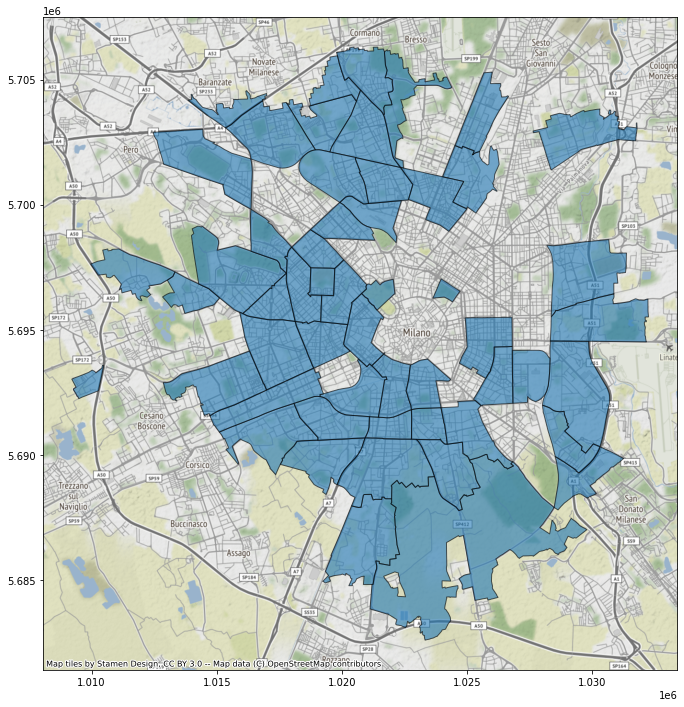

In [73]:
ax = quartieri_minori_media_con_geometria_e_numStalli.to_crs(epsg=3857).plot(figsize = (12,12), alpha = 0.6, edgecolor = "k")
ctx.add_basemap(ax)

# **9. una mappa di Milano con i diversi quartieri contornati in nero e l'indicazione delle aree di sosta, sottoforma di punti rossi**

In [74]:
area_sosta

id_amat  ...                  geometry
0           2  ...  POINT (9.17821 45.42991)
1           4  ...  POINT (9.16829 45.51697)
2           8  ...  POINT (9.08480 45.47628)
3           9  ...  POINT (9.15673 45.48228)
4          10  ...  POINT (9.12054 45.45506)
...       ...  ...                       ...
1517     3232  ...  POINT (9.16586 45.50530)
1518     3233  ...  POINT (9.16628 45.50584)
1519     3234  ...  POINT (9.16634 45.50568)
1520     3235  ...  POINT (9.16633 45.50532)
1521     3243  ...  POINT (9.21895 45.43356)

[1522 rows x 12 columns]

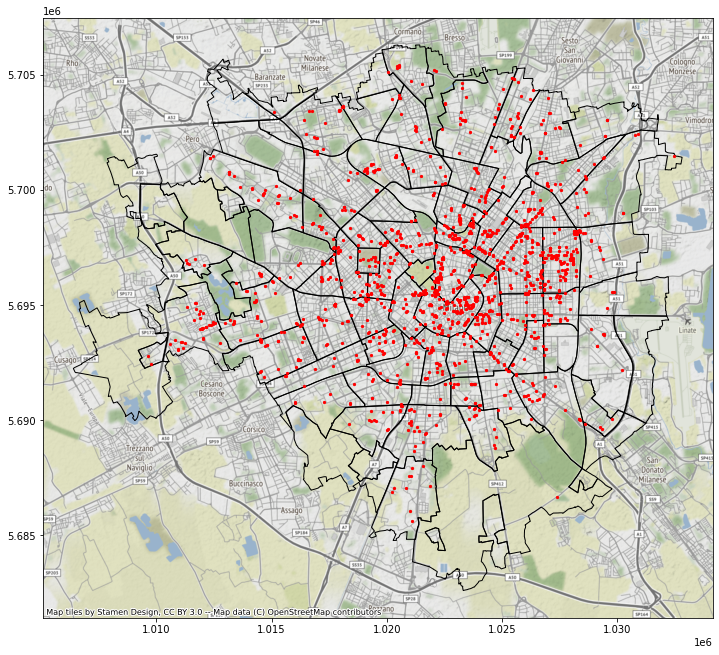

In [75]:
ax = milano.to_crs(epsg=3857).plot(figsize=(12,12), edgecolor = "k", facecolor = "none")
area_sosta.to_crs(epsg=3857).plot(ax=ax, color='red', markersize = 5)
ctx.add_basemap(ax)

# **10. una mappa di Milano con i diversi quartieri colorati a seconda del numero di aree di sosta presenti, con una legenda che indichi il significato dei colori**

In [76]:
tutti_quartieri_e_numStalli = pd.merge(quartieri_num_aree, milano, how="outer", on="NIL")
tutti_quartieri_e_numStalli

NIL  ...                                           geometry
0                                    ADRIANO  ...  POLYGON ((9.26729 45.51234, 9.26701 45.51241, ...
1                                     AFFORI  ...  POLYGON ((9.17767 45.51899, 9.17796 45.51848, ...
2   BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA  ...  POLYGON ((9.09315 45.46938, 9.09393 45.46802, ...
3                                 BANDE NERE  ...  POLYGON ((9.12727 45.46894, 9.12874 45.46840, ...
4                                     BARONA  ...  POLYGON ((9.16112 45.42589, 9.16056 45.42605, ...
..                                       ...  ...                                                ...
83                      RONCHETTO DELLE RANE  ...  POLYGON ((9.18364 45.40122, 9.18442 45.40004, ...
84                    MONLUE' - PONTE LAMBRO  ...  POLYGON ((9.27271 45.46079, 9.27276 45.46072, ...
85                               CHIARAVALLE  ...  POLYGON ((9.24507 45.41742, 9.24303 45.41508, ...
86                           CASCINA MERLATA  ...  POLYGON ((9.09928 45.53128, 9.09932 45.53118, ...
87                         PARCO DEI NAVIGLI  ...  POLYGON ((9.13886 45.42855, 9.13901 45.42836, ...

[88 rows x 10 columns]

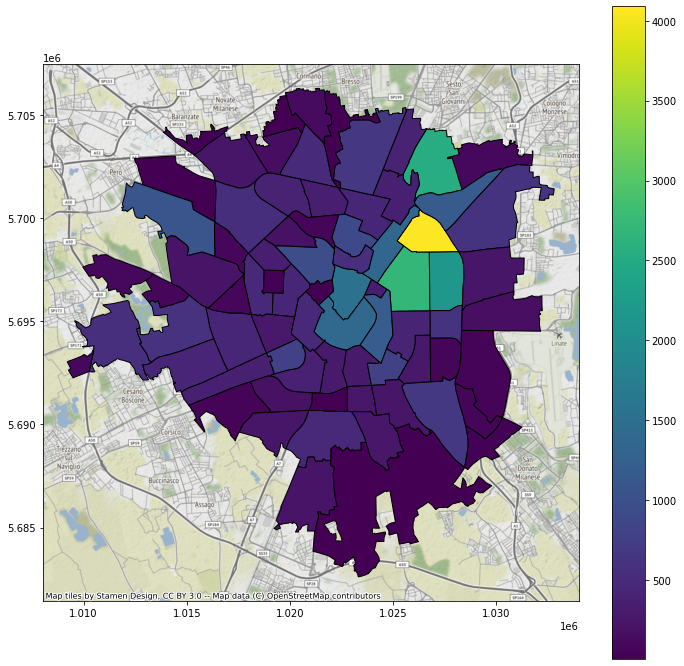

In [77]:
ax = tutti_quartieri_e_numStalli.to_crs(epsg=3857).plot(figsize = (12,12), column="stalli_tot", legend = True, edgecolor = "k")
ctx.add_basemap(ax)